In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw as pl
from scipy.stats import linregress, pearsonr, spearmanr
from scipy.optimize import curve_fit

# Chapter 9: Degree

## Exercise 9.4:

Plot the degree distribution of the network at http://www.networkatlas.eu/exercises/9/4/data.txt. Start from a plain degree distribution, then in log-log scale, finally plot the complement of the cumulative distribution.

In [2]:
# Load the edgelist into a graph
G = nx.read_edgelist("ex_9.4.txt", delimiter = "\t")

🔗 [NetworkX `Graph.degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)

<details>
<summary>💡 Hint</summary>

```python
dd = Counter(dict(G.degree).values())
print(dd)

In [15]:
#get the degree of each node using the provided documentation
degrees = dict(G.degree())

In [16]:
#create a dictionary from the above, extract the values to a list, and use Counter to find the frequency of each degree
counted_degrees = Counter(degrees.values())
print(counted_degrees)

Counter({1: 49452, 2: 30459, 3: 20612, 4: 14925, 5: 11256, 6: 8691, 7: 7027, 8: 5727, 9: 4849, 10: 4016, 11: 3385, 12: 2929, 13: 2657, 14: 2250, 15: 2090, 16: 1761, 17: 1488, 18: 1390, 19: 1357, 20: 1234, 21: 1090, 22: 987, 23: 935, 24: 841, 25: 748, 26: 680, 28: 629, 27: 627, 29: 604, 31: 492, 30: 487, 32: 473, 33: 401, 34: 399, 36: 377, 35: 367, 37: 337, 38: 310, 39: 300, 41: 275, 40: 274, 42: 254, 44: 246, 43: 239, 45: 230, 46: 199, 48: 195, 47: 193, 51: 190, 49: 172, 50: 168, 52: 167, 54: 147, 53: 141, 56: 134, 58: 129, 57: 128, 59: 127, 55: 123, 60: 113, 63: 106, 61: 102, 62: 101, 64: 99, 69: 91, 66: 87, 70: 84, 65: 80, 67: 79, 85: 77, 73: 76, 71: 71, 68: 67, 72: 67, 75: 67, 76: 65, 79: 64, 74: 58, 77: 56, 86: 55, 82: 52, 84: 49, 80: 48, 78: 48, 90: 48, 89: 47, 91: 45, 97: 43, 88: 43, 83: 41, 87: 41, 98: 41, 99: 38, 81: 38, 95: 35, 100: 33, 105: 33, 101: 33, 102: 31, 92: 31, 116: 30, 112: 30, 104: 30, 94: 30, 111: 30, 93: 29, 106: 28, 113: 26, 109: 26, 103: 25, 124: 24, 115: 23, 1

[Pandas `DataFrame` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

<details>
<summary>💡 Hint</summary>

```python
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
dd


In [23]:
#create a pandas dataframe from this Counter dictionary:
#first, turn the items in the dict into a list, and create the columns "k" for degree and "count" for the count of each degree
#finally, sort the values in this dataframe in ascending order by degree ("k")
df = pd.DataFrame(list(counted_degrees.items()), columns = ('k', 'count')).sort_values(by = 'k')
df.head(15)

,k,count
154,1,49452
83,2,30459
155,3,20612
136,4,14925
38,5,11256
149,6,8691
77,7,7027
99,8,5727
40,9,4849
138,10,4016


[Pandas `DataFrame.plot` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

<details>
<summary>💡 Hint</summary>

```python
dd.plot(kind = "scatter", x = "k", y = "count", color = "crimson")
plt.show()

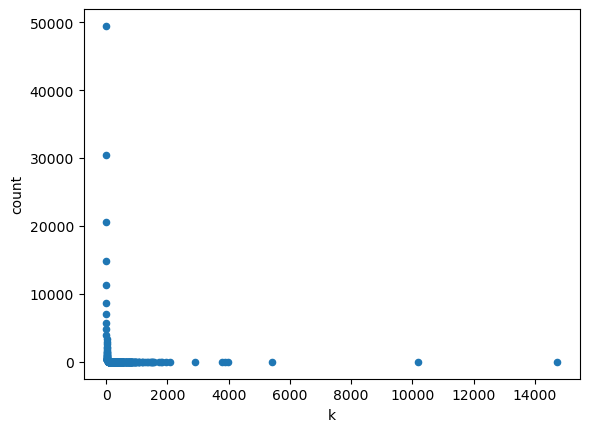

In [27]:
#create a scatterplot of the degree distribution where the x-axis is "k" and the y-axis is "count" using the pandas plot function (documentation provided)
df.plot(kind = 'scatter', x = 'k', y = 'count')
plt.show()

<details>
<summary>💡 Hint</summary>

```python
dd.plot(kind = "scatter", x = "k", y = "count", color = "crimson", loglog = True)
plt.show()

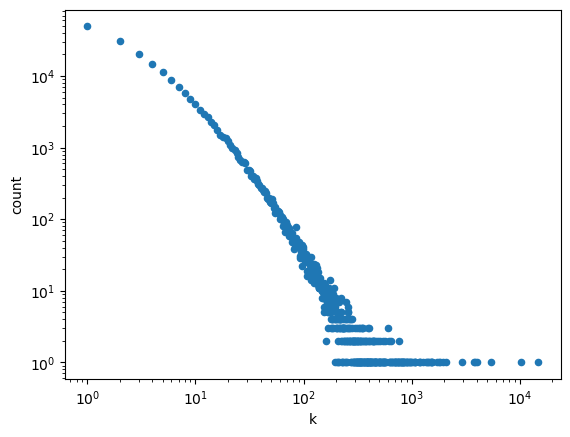

In [28]:
#repeat, but this time set the parameter "loglog" to be True to get the plot in log-log scale
df.plot(kind = 'scatter', x = 'k', y = 'count', loglog = True)
plt.show()

To make the CCDF we need to know how many nodes have degree equal to or higher than a specific value.

<details>
<summary>💡 Hint</summary>

```python
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf

In [29]:
#sort the dataframe in descending order
descending = df.sort_values(by = 'k', ascending = False)
descending

,k,count
153,14730,1
131,10185,1
200,5420,1
259,3986,1
184,3880,1
...,...,...
38,5,11256
136,4,14925
155,3,20612
83,2,30459


[Pandas `DataFrame.cumsum` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html)

<details>
<summary>💡 Hint</summary>

```python
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf

In [31]:
#create a new column in the dataframe holding the cumulative sum - use the "cumsum" function in the provided pandas documentation
descending['cumsum'] = descending['count'].cumsum()
descending

,k,count,cumsum
153,14730,1,1
131,10185,1,2
200,5420,1,3
259,3986,1,4
184,3880,1,5
...,...,...,...
38,5,11256,81143
136,4,14925,96068
155,3,20612,116680
83,2,30459,147139


<details>
<summary>💡 Hint</summary>

```python
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf

In [33]:
#normalize by the total degree sum, so that the count becomes a probability. Save this in a column called "ccdf".
#Tip: Use the DataFrame["column_name"].sum function.
descending['ccdf'] = descending['cumsum'] / descending['count'].sum()
descending


,k,count,cumsum,ccdf
153,14730,1,1,0.000005
131,10185,1,2,0.000010
200,5420,1,3,0.000015
259,3986,1,4,0.000020
184,3880,1,5,0.000025
...,...,...,...,...
38,5,11256,81143,0.412750
136,4,14925,96068,0.488669
155,3,20612,116680,0.593516
83,2,30459,147139,0.748452


<details>
<summary>💡 Hint</summary>

```python
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
ccdf

In [34]:
#sort again in ascending order
ccdf = descending.sort_values(by = 'k')
ccdf

,k,count,cumsum,ccdf
154,1,49452,196591,1.000000
83,2,30459,147139,0.748452
155,3,20612,116680,0.593516
136,4,14925,96068,0.488669
38,5,11256,81143,0.412750
...,...,...,...,...
184,3880,1,5,0.000025
259,3986,1,4,0.000020
200,5420,1,3,0.000015
131,10185,1,2,0.000010


<Axes: title={'center': 'CCDF Log-Log'}, xlabel='k'>

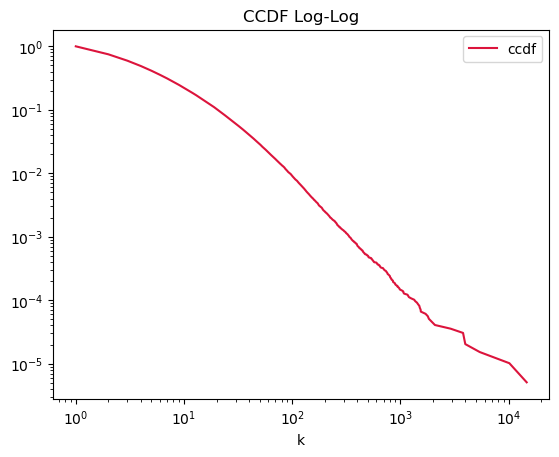

In [37]:
#plot the CCDF in log-log scale to see the result using the same method as for the log-log plot above, except now it's a line-plot, not a scatterplot, and the y-axis should be "ccdf"
ccdf.plot(kind = 'line', x = 'k', y = 'ccdf', loglog = True, color = 'crimson', title = 'CCDF Log-Log')

## Exercise 9.5:

Estimate the power law exponent of the CCDF degree distribution from the previous exercise. First by a linear regression on the loglog plane, then by using the powerlaw package. Do they agree? Is this a shifted power law? If so, what’s kmin? 

(Hint: the powerlaw package can calculate this for you)

In [63]:
# Reuse the data from exercise 9.5, so we'll be continuing with our ccdf dataframe!
# Check it works by printing the dataframe:
ccdf.head(10)

,k,count,cumsum,ccdf,fit
154,1,49452,196591,1.000000,10.550150
83,2,30459,147139,0.748452,3.524685
155,3,20612,116680,0.593516,1.856082
136,4,14925,96068,0.488669,1.177557
38,5,11256,81143,0.412750,0.827370
149,6,8691,69887,0.355494,0.620096
77,7,7027,61196,0.311286,0.485925
99,8,5727,54169,0.275542,0.393408
40,9,4849,48442,0.246410,0.326539
138,10,4016,43593,0.221745,0.276415


<details>
<summary>💡 Hint</summary>

```python
logcdf = np.log10(ccdf[["k", "ccdf"]])

In [62]:
#take the base 10 logarithm of both degree and CCDF and save this to a new dataframe
log_df = np.log10(ccdf[['k', 'ccdf']])
log_df.head(10)

,k,ccdf
154,0.000000,0.000000
83,0.301030,-0.125836
155,0.477121,-0.226567
136,0.602060,-0.310985
38,0.698970,-0.384313
149,0.778151,-0.449167
77,0.845098,-0.506841
99,0.903090,-0.559813
40,0.954243,-0.608342
138,1.000000,-0.654147


<details>
<summary>💡 Hint</summary>

```python
slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))

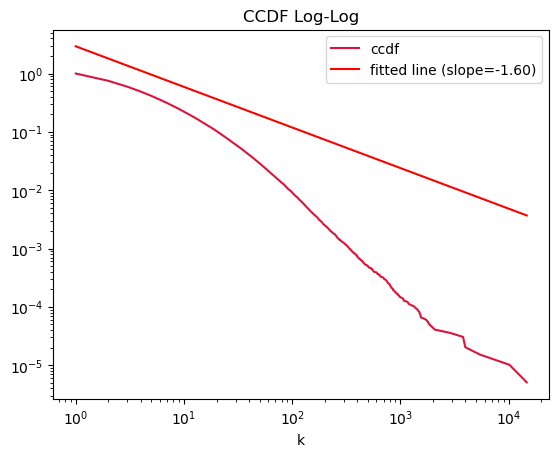

In [58]:
#do a linear regression on this dataframe using the linregress function
regress = linregress(log_df['k'], log_df['ccdf'])

y_pred_log = regress.intercept + regress.slope * log_df['k']

# transform back
y_pred = np.exp(y_pred_log)

# plot
ccdf.plot(kind='line', x='k', y='ccdf', loglog=True, color='crimson', title='CCDF Log-Log')
plt.plot(ccdf['k'], y_pred, 'r', label=f'fitted line (slope={regress.slope:.2f})')
plt.legend()
plt.show()


In [41]:
#check the documentation to see what parameters you need to print to get the intercept, slope, r-squared and p-value, and print these
print(f'Intercept: {regress.intercept}, Slope: {regress.slope}, R^2: {regress.rvalue}, p-val: {regress.pvalue}')


Intercept: 1.0727867127590787, Slope: -1.6012552320951492, R^2: -0.9935025413840728, p-val: 0.0


To find the actual k_min, we need to find the degree value corresponding to the probability in .power_law.
Remember, k_min is the minimum degree for which our power law fits if this is a shifted power law.

[Powerlaw documentation](https://pythonhosted.org/powerlaw/#powerlaw.Distribution.fit)

<details>
<summary>💡 Hint</summary>

```python
results = pl.Fit(ccdf["ccdf"])
k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

In [53]:
#fit a powerlaw function to the CCDF using the powerlaw (pl) package and save these to a variable named "results"
results = pl.Fit(ccdf['ccdf'])

Calculating best minimal value for power law fit


In [59]:
#then find k_min also using the powerlaw package
k_min = ccdf[ccdf['ccdf'] == results.power_law.xmin]['k']
k_min

np.float64(0.001475143826523086)

In [51]:
#print the results, showing the powerlaw function in the format: Kappa x ^ (-alpha)
#also print k_min
print(f"Powerlaw CCDF Fit: {10 ** results.power_law.Kappa}x ^ -{results.power_law.alpha} (k_min = {k_min.values[0]})")


Powerlaw CCDF Fit: 10.550150072357743x ^ -1.5816974862382178 (k_min = 269)


<details>
<summary>💡 Hint</summary>

```python
ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)

In [60]:
#create a new column, "fit", in the ccdf dataframe that computes the fit of each degree-value in the dataframe.
ccdf['fit'] = (10 ** results.power_law.Kappa) * (ccdf['k'] ** -results.power_law.alpha)

<details>
<summary>💡 Hint</summary>

```python
ax = plt.gca()
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "crimson", loglog = True, ax = ax)
ccdf.plot(kind = "line", x = "k", y = "fit", color = "cornflowerblue", loglog = True, ax = ax)

<Axes: xlabel='k'>

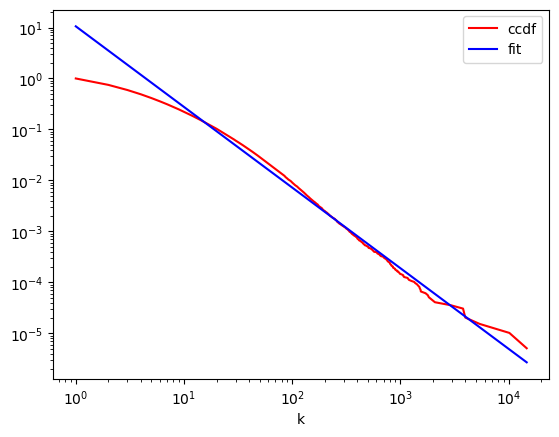

In [61]:
#use ax = plt.gca() to ensure both plots are on the same axes instead of separate plots
#then plot the ccdf and powerlaw-fit using the pandas plot-function like before, setting "ax = ax" for both
ax = plt.gca()
ccdf.plot(kind = 'line', x = 'k', y = 'ccdf', color = 'red', loglog = True, ax = ax)
ccdf.plot(kind = 'line', x = 'k', y = 'fit', color = 'blue', loglog = True, ax = ax)

## Exercise 9.6:

Find a way to fit the truncated power law of the network at http://www.networkatlas.eu/exercises/9/6/data.net. 

Hint: use the scipy.optimize. curve_fit to fit an arbitrary function and use the functional form provided in chapter 9.

In [ ]:
# Load the data and redo the CCDF. We simply reuse the code from previously.
G = nx.read_pajek("ex_9.6.txt")
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

In [ ]:
# Let's define a custom function which is a power law with its exponential truncated
# The formula we're defining is f(x) = x^a e^(-lambda*x)
# Lambda is the cutoff parameter that makes this a truncated power law
def f(x, a, l):
   return (x ** a) * np.exp(-l * x)

In [ ]:
# Then we define its logarithm, because we fit it to the log of the CCDF in curve_fit
# We do this because we want to minimize errors in log-space (relative error)
# This is simply a common method when fitting heavy-tailed distributions
# New function is log10(f(x)) = a*log10(x) - ((lambda*x)/ln(10))
def log_f(x, a, l):
   return np.log10(f(x, a, l))

[SciPy `curve_fit` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

<details>
<summary>💡 Hint</summary>

```python
popt, pcov = curve_fit(log_f, ccdf["k"], np.log10(ccdf["ccdf"]), p0 = (1, 1))
ccdf["fit"] = ccdf.apply(lambda x: f(x["k"], popt[0], popt[1]), axis = 1)

In [ ]:
#Plot this using the curve_fit function from scipy


In [ ]:
#reuse the plotting code from exercise 9.5 to plot the ccdf and the (hint is the very last one in ex. 9.5)


What is a truncated power law, looking at the plot we just created?

# Chapter 12: Density

## Exercise 12.3
Calculate the global, average and local clustering coefficient.

In [3]:
#Load the edgelist
G = nx.read_edgelist("ex_12.3.txt")

🔗 [NetworkX `transitivity` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html)

🔗 [NetworkX `clustering` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html)

🔗 [NetworkX `average_clustering` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html)

<details>
<summary>💡 Hint</summary>

```python
global_clustering = nx.transitivity(G)
print(global_clustering)

In [4]:
# Global clustering coefficient
global_clustering = nx.transitivity(G)
print(global_clustering)

0.12443636088060324


<details>
<summary>💡 Hint</summary>

```python
avg_clustering = nx.average_clustering(G) #avg local clustering
print(avg_clustering)

In [5]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(avg_clustering)

0.6464630921565051


<details>
<summary>💡 Hint</summary>

```python
local_clustering = nx.clustering(G)
print(local_clustering)

In [6]:
# Local clustering coefficient
clustering = nx.clustering(G)
print(clustering)

{'100': 1.0, '101': 1.0, '10': 0.6, '11': 0.5333333333333333, '15': 0.03110920403346921, '30': 0.6, '103': 0.4166666666666667, '104': 0.7111111111111111, '259': 0.34615384615384615, '422': 1.0, '451': 0, '341': 0.6666666666666666, '344': 0.5454545454545454, '105': 0.6666666666666666, '106': 0.47619047619047616, '107': 0.7, '108': 0.4358974358974359, '110': 0.37777777777777777, '109': 0.5, '189': 0.45454545454545453, '193': 0.5833333333333334, '111': 0.6, '180': 0.4444444444444444, '331': 0.42857142857142855, '166': 0.33088235294117646, '210': 0.37777777777777777, '264': 0.3055555555555556, '329': 0.7, '12': 0.12656641604010024, '13': 0.14761904761904762, '14': 0.4, '112': 0.6071428571428571, '113': 0.5272727272727272, '115': 0.6, '116': 1.0, '114': 0.31620553359683795, '139': 0.4444444444444444, '202': 0.5, '244': 0.5714285714285714, '117': 1.0, '138': 0.2904761904761905, '268': 0.6, '316': 1.0, '317': 1.0, '356': 0.6071428571428571, '396': 0.25, '402': 0.8, '403': 0.5, '404': 0.821428

## Exercise 12.4
What is the size in number of nodes of the largest maximal clique of the network used in Exercise 12.3? Which nodes are part of it?

🔗 [NetworkX `find_cliques` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.find_cliques.html) 


<details>
<summary>💡 Hint</summary>

```python
maximal_cliques = list(nx.find_cliques(G))

In [16]:
# Find all maximal cliques
max_cliq = list(nx.find_cliques(G))

**NOTE:** The solutions in the book use deprecated function .graph_clique_number(), which work for older versions of NetworkX, but we present other ways of how to find the largest clique.

🔗 [NetworkX `node_clique_number` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.node_clique_number.html) 


<details>
<summary>💡 Hint</summary>

```python

# Option one
size_largest_clique = max(len(clique) for clique in maximal_cliques)
print("Largest maximal clique size (option one): ", size_largest_clique)

# Option two
size_largest_clique = max(nx.node_clique_number(G).values())
print("Largest maximal clique size (option two): ", size_largest_clique)

In [18]:
len(max(max_cliq, key = len))

9

<details>
<summary>💡 Hint</summary>

```python
for clique in maximal_cliques:
    if len(clique) == size_largest_clique:
        print(clique)

In [19]:
# List nodes that are part of the largest clique. There can be more than one.
max(max_cliq, key = len)

['15', '5', '2', '82', '4', '12', '86', '13', '87']

# Chapter 13: Shortest Paths

## Excercise 13.4
What's the diameter of the graph below? What's its average path length?

<img src="shortest_paths.png" alt="Getting Started" width="400">

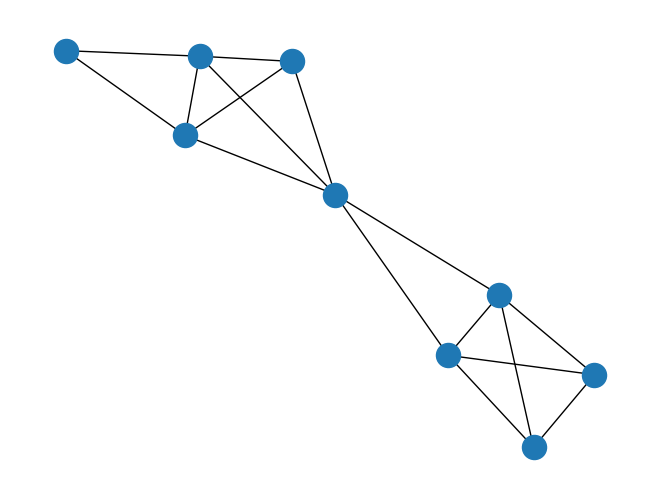

In [21]:
# Graph based on the adjacency list derived from the image
G = nx.Graph()

edges = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), 
         (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]

G.add_edges_from(edges)

nx.draw(G)

**For manual calculations**
<details>
<summary>💡 Hint</summary>

```python
# Calculate shortests paths between each pair of nodes as a matrix representation.

# Calculate shortest path lengths between all pairs of nodes
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Convert to a matrix form
num_nodes = 9
shortest_paths_matrix = np.zeros((num_nodes, num_nodes))

# Fill in the matrix with shortest path lengths
for i in range(1, num_nodes + 1):
    for j in range(1, num_nodes + 1):
        shortest_paths_matrix[i - 1][j - 1] = shortest_paths[i][j]

shortest_paths_matrix

In [ ]:
# Visual representation of shortestst paths between nodes as a matrix

# Calculate shortest path lengths between all pairs of nodes

# Convert to a matrix form

# Fill in the matrix with shortest path lengths


**For python calculations**

🔗 [NetworkX `diameter` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html) 


<details>
<summary>💡 Hint</summary>

```python
diameter = nx.diameter(G)
print(diameter)

In [22]:
# Diameter
print(nx.diameter(G))

4


🔗 [NetworkX `average_shortest_path_length` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html) 


<details>
<summary>💡 Hint</summary>

```python
avg_spl = nx.average_shortest_path_length(G)
print(avg_spl)

In [ ]:
# Average shortest path length


# Chapter 14: Node Ranking

# Exercise 14.4:

What's the most central node in this network (ex_14.4) according to PageRank? 

How does PageRank compares with the in-degree? (for instance, you could calculate the Spearman and/or Pearson correlation between the two)

🔗 [NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html) 

<details>
<summary>💡 Hint</summary>

```python
# Load the data
G = nx.read_edgelist("ex_14.4.txt", create_using = nx.DiGraph())
print(G)

In [ ]:
# Load the data
G = nx.read_edgelist("ex_14.4.txt", create_using = nx.DiGraph())
print(G)

🔗 [NetworkX `pagerank` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)  

<details>
<summary>💡 Hint</summary>

```python
# Calculate the pagerank 
pagerank = nx.pagerank(G)
print(pagerank)

In [ ]:
# Calculate the pagerank 


🔗 [Python `max` function documentation](https://docs.python.org/3/library/functions.html#max)  

<details>
<summary>💡 Hint</summary>

```python
# Find the node with the maximum value
most_central = max(pagerank, key = pagerank.get)
print("Most central node: %s (PR = %1.4f)" % (most_central, pagerank[most_central]))


In [ ]:
# Find the node with the maximum value


🔗 [NetworkX `in_degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html)  
🔗 [NumPy arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html)  

<details>
<summary>💡 Hint</summary>

```python
# Let's get all the in-degrees 
degree = dict(G.in_degree)
pagerank_np = np.array([pagerank[v] for v in G.nodes])
degree_np = np.array([degree[v] for v in G.nodes])

print(degree)
print(pagerank_np)
print(degree_np)

In [ ]:
# Let's get all the in-degrees 


🔗 [SciPy `pearsonr` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)  
🔗 [SciPy `spearmanr` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)  

<details>
<summary>💡 Hint</summary>

```python
# Calculate the spearman and pearson correlation
r, p = pearsonr(pagerank_np, degree_np)
print("Pearson correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

r, p = spearmanr(pagerank_np, degree_np)
print("Spearman correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

In [ ]:
# Calculate the spearman and pearson correlation


## Exercise 14.5:

Which is the most authoritative node in the network (ex_14.4) used for Exercise 14.4? Which one is the best hub? 

Use the HITS algorithm to motivate your answer (if using networkx, use the scipy version of the algorithm).

🔗 [NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html) 

<details>
<summary>💡 Hint</summary>

```python
# Load the same network as ex_14.4
G = nx.read_edgelist("ex_14.4.txt", create_using = nx.DiGraph())
print(G)


In [ ]:
# Load the same network as ex_14.4
G = nx.read_edgelist("ex_14.4.txt", create_using = nx.DiGraph())
print(G)

🔗 [NetworkX `hits` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.hits_alg.hits.html)  

<details>
<summary>💡 Hint</summary>

```python
# Calculate HITS (Hubs and Authorities)
hits = nx.hits(G)

print(hits[0]) # Hubs
print(hits[1]) # Authorities


In [ ]:
# Calculate HITS (Hubs and Authorities)
# nx.hits_scipy(G) might not work, try the hint instead


The HITS algorithm computes two numbers for a node:
- **Hubs** estimates the node value based on **outgoing links**.
- **Authorities** estimates the node value based on the **incoming links**.


🔗 [Python `max` function documentation](https://docs.python.org/3/library/functions.html#max)  

<details>
<summary>💡 Hint</summary>

```python
# Find the nodes with the maximum values, meaning the the best hub and best authority
best_hub = max(hits[0], key=hits[0].get)   # Hubs
best_auth = max(hits[1], key=hits[1].get)  # Authorities

print(f"Best Hub: {best_hub}")
print(f"Best Authority: {best_auth}")


In [ ]:
# Find the nodes with the maximum values, meaning the the best hub and best authority


## Exercise 14.7:

Calculate the k-core decomposition of this network (ex_14.7). 

What's the highest core number in the network? 
How many nodes are part of the maximum core?


🔗 [NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html)  

<details>
<summary>💡 Hint</summary>

```python
# Load the data
G = nx.read_edgelist("ex_14.7.txt")


In [ ]:
G = nx.read_edgelist("ex_14.7.txt")

🔗 [NetworkX `core_number` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.core.core_number.html)  

<details>
<summary>💡 Hint</summary>

```python
# Calculating the k-core decomposition
kcore = nx.core_number(G)

In [ ]:
# Calculating the k-core decomposition


The function nore_number returns the core number for each node.

- A k-core is a maximal subgraph that contains nodes of degree k or more.

- The core number of a node is the largest value k of a k-core containing that node.

🔗 [Python `max` function documentation](https://docs.python.org/3/library/functions.html#max)  

<details>
<summary>💡 Hint</summary>

```python
# Store the maximum core number
highest_core = max(kcore.values())
print(highest_core)

# How many nodes are part of the maximum core?
print("# of nodes in the maximum core: %d" % (len([v for v in kcore if kcore[v] == highest_core])))

In [ ]:
# Store the maximum core number

# How many nodes are part of the maximum core?
